In [2]:
## import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

## logistic regression and data handling libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics, svm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics, svm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

## neural network library
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Dense, Dropout
from mlxtend.plotting import plot_confusion_matrix

# saving model
import pickle
import joblib

In [3]:
data = pd.read_csv("heart.csv")
data

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


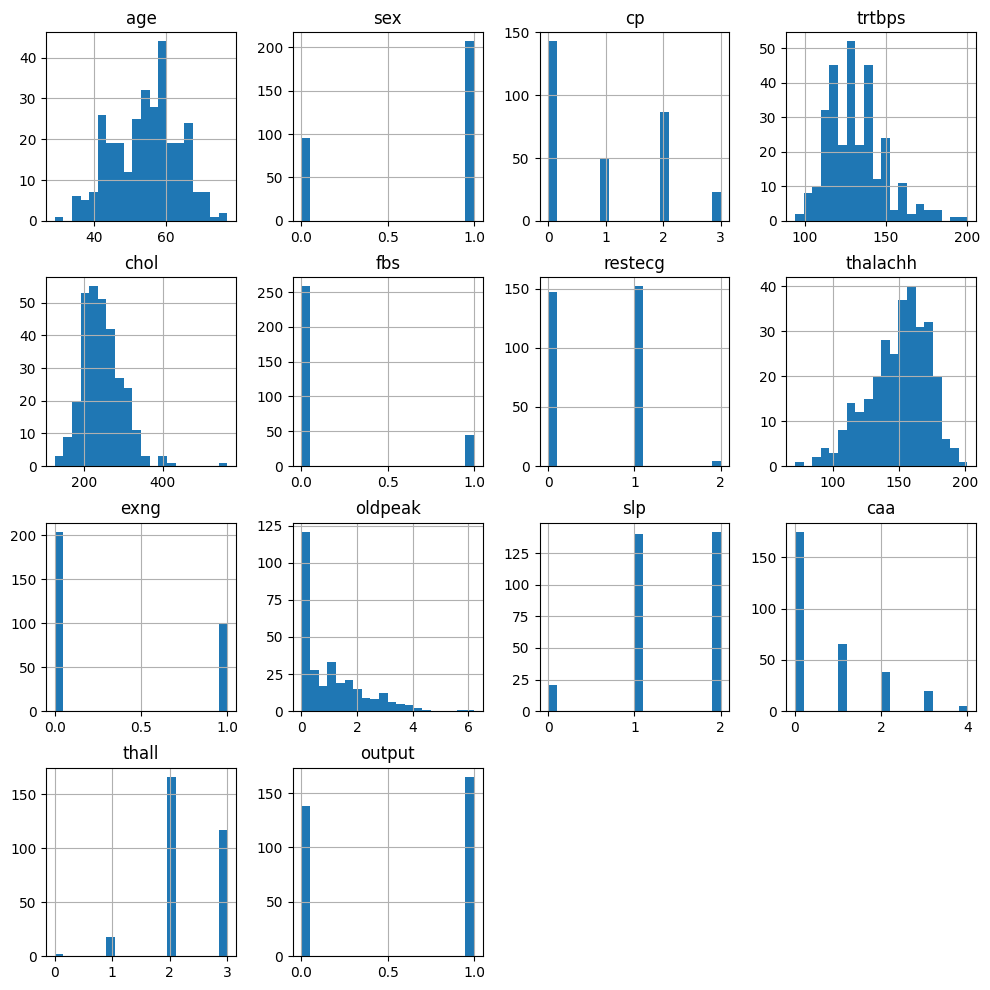

In [5]:
data.hist(bins=20, figsize=(12,12))
plt.savefig("heart_attack_plots/overall_hist_1.png")

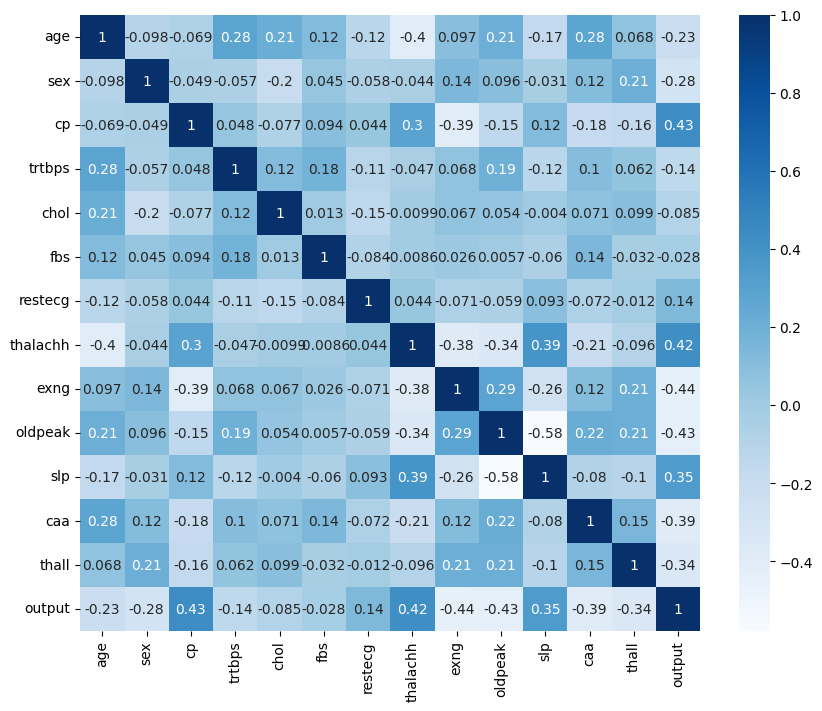

In [22]:
# correlation matrix for diabetes dataset
fig = plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),cmap="Blues",annot=True)
plt.savefig('heart_attack_plots/corr_matrix.png', bbox_inches = 'tight')

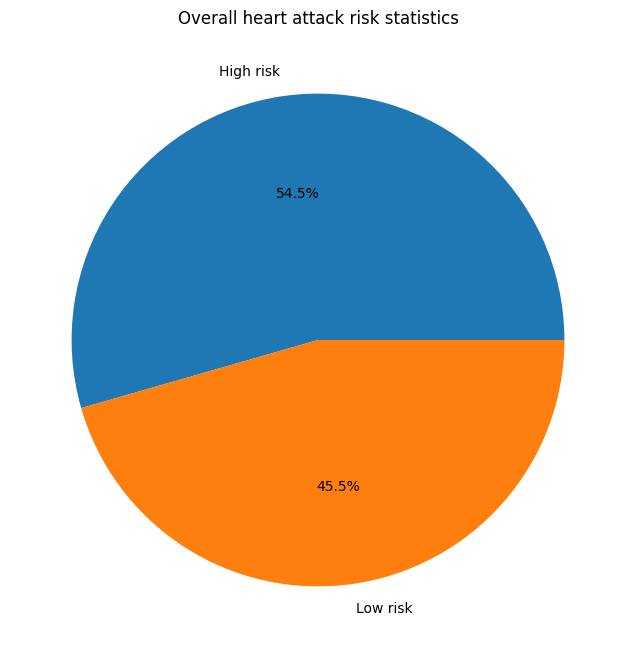

In [7]:
# pie chart showing overall poisonous statistics
fig, ax = plt.subplots(figsize=(8,8))
plt.pie([data['output'].sum(), data.shape[0] - data['output'].sum()], labels=['High risk', 'Low risk'], autopct='%1.1f%%')
ax.set_title("Overall heart attack risk statistics")
plt.savefig("heart_attack_plots/heart_risk.png")

Text(0.5, 1.0, 'Age Distribution by Risk')

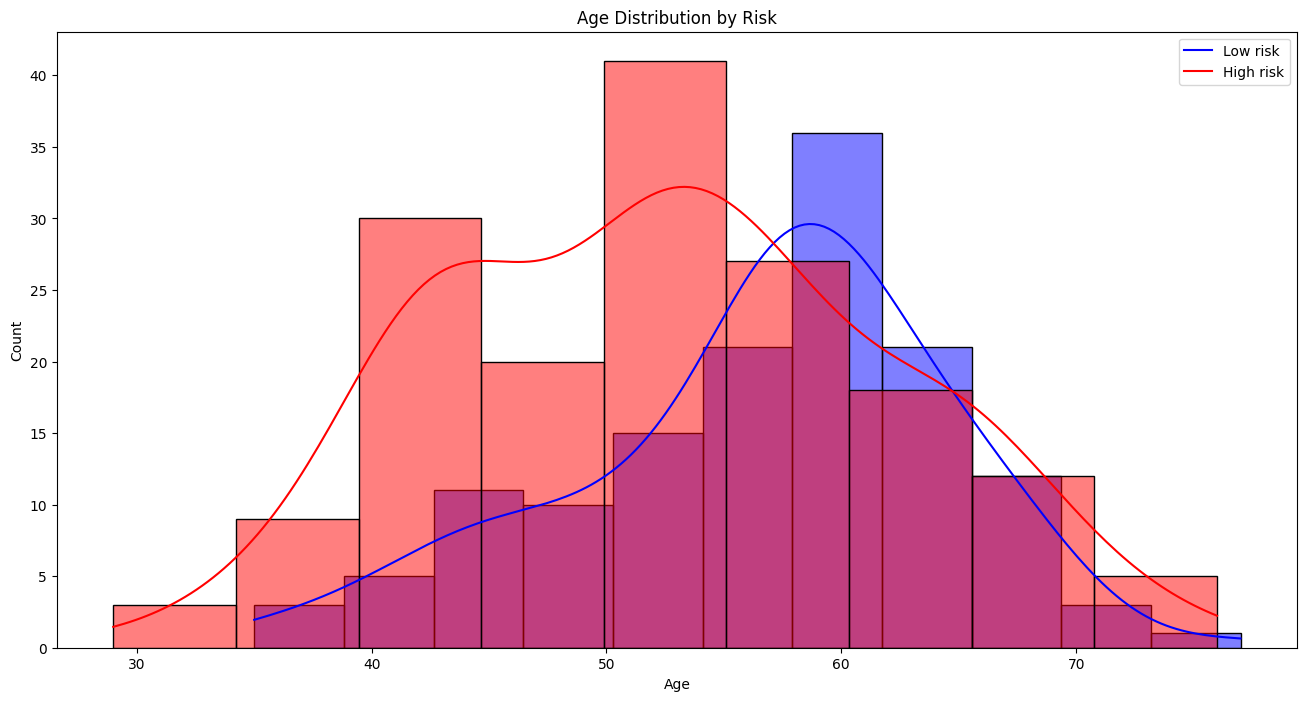

In [8]:
## Visualise the population age distribution between the high risk and low risk
plt.figure(figsize=(16,8))
ax = sns.histplot(data["age"][data.output == 0], color="blue", kde=True), sns.histplot(data["age"][data.output == 1], color="red", kde=True)
plt.legend(['Low risk', 'High risk'])
plt.xlabel('Age')
plt.title('Age Distribution by Risk')
plt.savefig("heart_attack_plots/age_risk.png")

Text(0.5, 1.0, 'Cholesterol Distribution by Risk')

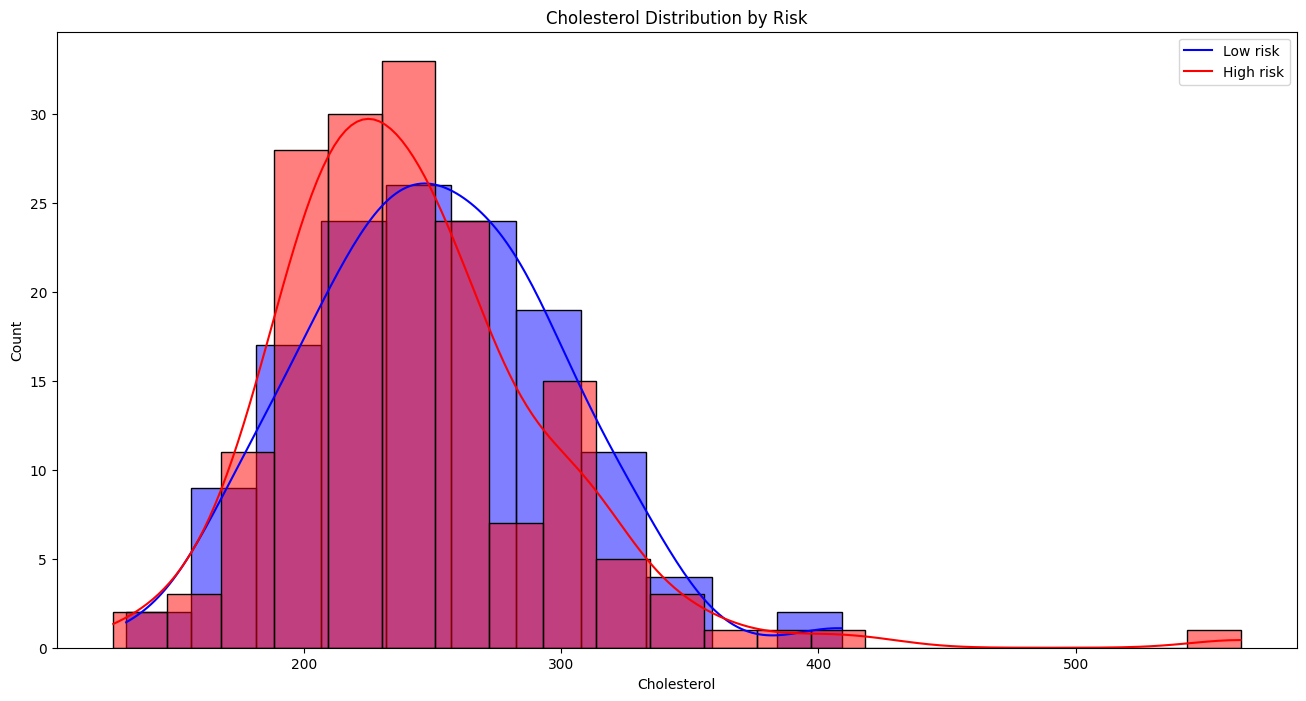

In [9]:
## Visualise the population cholesterol distribution between the high risk and low risk
plt.figure(figsize=(16,8))
ax = sns.histplot(data["chol"][data.output == 0], color="blue", kde=True), sns.histplot(data["chol"][data.output == 1], color="red", kde=True)
plt.legend(['Low risk', 'High risk'])
plt.xlabel('Cholesterol')
plt.title('Cholesterol Distribution by Risk')
plt.savefig("heart_attack_plots/chol_risk.png")

Text(0.5, 1.0, 'Cholesterol Distribution by Risk')

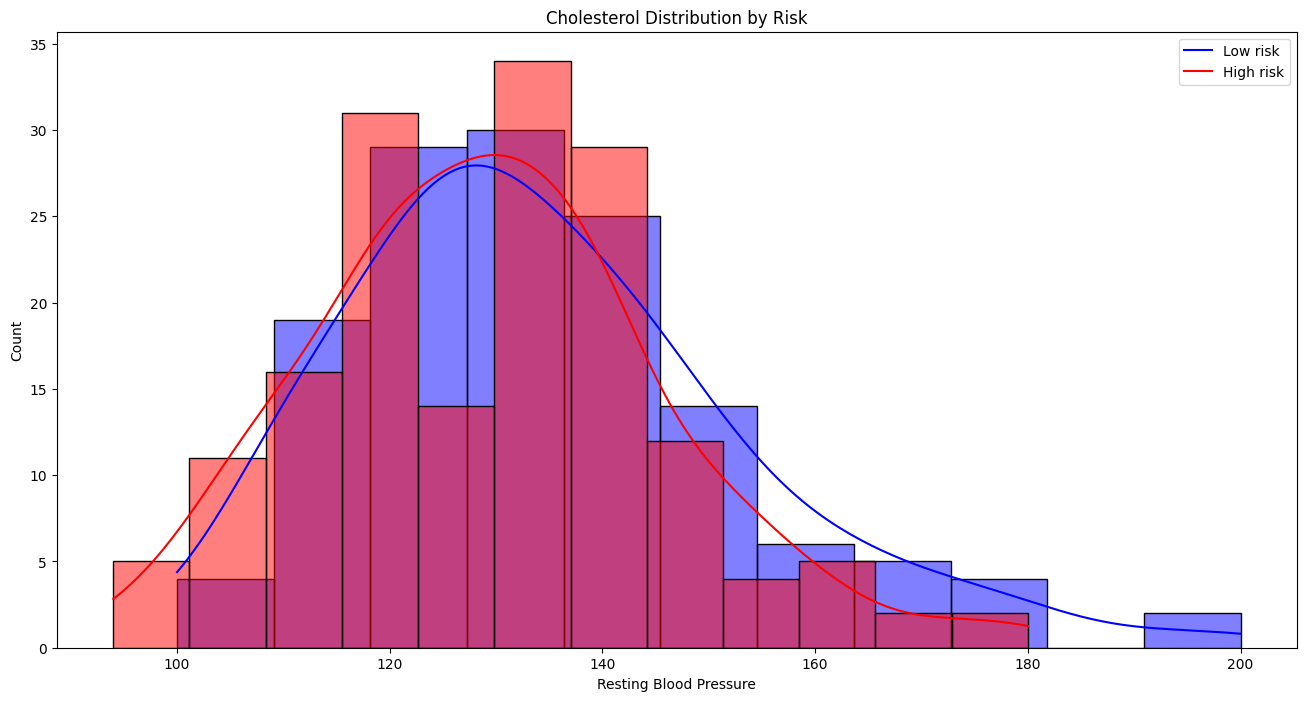

In [10]:
## Visualise the population cholesterol distribution between the high risk and low risk
plt.figure(figsize=(16,8))
ax = sns.histplot(data["trtbps"][data.output == 0], color="blue", kde=True), sns.histplot(data["trtbps"][data.output == 1], color="red", kde=True)
plt.legend(['Low risk', 'High risk'])
plt.xlabel('Resting Blood Pressure')
plt.title('Cholesterol Distribution by Risk')

In [11]:
# data standardisation and splitting
data_to_use = data.iloc[:,0:13]
data_to_target = data.iloc[:,13]

# split data 20% for testing 80% for training
x_train, x_test, y_train, y_test = train_test_split(data_to_use, data_to_target, test_size=0.2, random_state=6) 

# normalise data to fit mean 0 variance 1
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# create statistics dataframe to store accuracy and runtime etc.
acc_db = pd.DataFrame(columns=['Accuracy', 'Run Time (s)'])

In [12]:
# Logistic regression model
start = time.time()
log_reg = LogisticRegression()
# train the model
log_reg.fit(x_train, y_train)
# test model on test data
y_pred_log = log_reg.predict(x_test)
# measure runtime of model
run_time = time.time() - start

db = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_log})

acc_db.loc['Logistic regression'] = [metrics.accuracy_score(y_test,y_pred_log), run_time]

acc_db

,Accuracy,Run Time (s)
Logistic regression,0.819672,0.004498


In [13]:
# Gaussian naive bayes model

start = time.time()
gnb = GaussianNB()
# train the model
gnb.fit(x_train,y_train)
# test model on test data
y_pred_gnb = gnb.predict(x_test)
# measure runtime of model
run_time = time.time() - start

# add prediction to dataframe
df_gnb = pd.DataFrame({"Actual": y_test, "Predicted": y_pred_gnb})

acc_db.loc['Gaussian naive Bayes'] = [metrics.accuracy_score(y_test, y_pred_gnb), run_time]

acc_db

,Accuracy,Run Time (s)
Logistic regression,0.819672,0.004498
Gaussian naive Bayes,0.803279,0.001500


In [14]:
# find best k for knn model
bestacc = 0
for k in range(30):
    knn_model = KNeighborsClassifier(n_neighbors=k+1)
    knn_model.fit(x_train, y_train)
    y_pred_knn = knn_model.predict(x_test)
    if metrics.accuracy_score(y_test, y_pred_knn) > bestacc:
        bestk = k+1
        bestacc = metrics.accuracy_score(y_test, y_pred_knn)

# kNN model best number of neighbours

start = time.time()
knn_model = KNeighborsClassifier(n_neighbors=bestk)
# train the model
knn_model.fit(x_train, y_train)
# test model on test data
y_pred_knn = knn_model.predict(x_test)
# measure runtime of model
run_time = time.time() - start

# add prediction to dataframe
df_knn = pd.DataFrame({"Actual": y_test, "Predicted": y_pred_knn})

acc_db.loc['k Neighbours k='+str(bestk)] = [metrics.accuracy_score(y_test, y_pred_knn), run_time]

acc_db

,Accuracy,Run Time (s)
Logistic regression,0.819672,0.004498
Gaussian naive Bayes,0.803279,0.001500
k Neighbours k=3,0.868852,0.005501


In [15]:
# support vector with variable kernel - options: {‘linear’, 'poly', ‘rbf’, ‘sigmoid’}
start = time.time()
kernel = 'linear'
svr = svm.SVC(kernel=kernel, degree=4)
# train the model
svr.fit(x_train,y_train)
# test model on test data
y_pred_svr = svr.predict(x_test)
# measure runtime of model
run_time = time.time() - start

# add prediction and actual to database
db_svr = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_svr})

# add statistics to database
acc_db.loc['Support Vector kernel='+kernel] = [metrics.accuracy_score(y_test, y_pred_svr), run_time]

start = time.time()
kernel = 'poly'
svr = svm.SVC(kernel=kernel, degree=4)
# train the model
svr.fit(x_train,y_train)
# test model on test data
y_pred_svr = svr.predict(x_test)
# measure runtime of model
run_time = time.time() - start

# add prediction and actual to database
db_svr = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_svr})

# add statistics to database
acc_db.loc['Support Vector kernel='+kernel] = [metrics.accuracy_score(y_test, y_pred_svr), run_time]

start = time.time()
kernel = 'rbf'
svr = svm.SVC(kernel=kernel, degree=4)
# train the model
svr.fit(x_train,y_train)
# test model on test data
y_pred_svr = svr.predict(x_test)
# measure runtime of model
run_time = time.time() - start

# add prediction and actual to database
db_svr = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_svr})

# add statistics to database
acc_db.loc['Support Vector kernel='+kernel] = [metrics.accuracy_score(y_test, y_pred_svr), run_time]

start = time.time()
kernel = 'sigmoid'
svr = svm.SVC(kernel=kernel, degree=4)
# train the model
svr.fit(x_train,y_train)
# test model on test data
y_pred_svr = svr.predict(x_test)
# measure runtime of model
run_time = time.time() - start

# add prediction and actual to database
db_svr = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_svr})

# add statistics to database
acc_db.loc['Support Vector kernel='+kernel] = [metrics.accuracy_score(y_test, y_pred_svr), run_time]

acc_db


,Accuracy,Run Time (s)
Logistic regression,0.819672,0.004498
Gaussian naive Bayes,0.803279,0.001500
k Neighbours k=3,0.868852,0.005501
Support Vector kernel=linear,0.819672,0.004497
Support Vector kernel=poly,0.672131,0.004500
Support Vector kernel=rbf,0.786885,0.006501
Support Vector kernel=sigmoid,0.819672,0.004001


In [16]:
# decision tree classifier models with variable depth and criterion
start = time.time()
decisionTree_model_gini = DecisionTreeClassifier(random_state=4000)
# train the model
decisionTree_model_gini.fit(x_train,y_train)
# test model on test data
y_pred_gini = decisionTree_model_gini.predict(x_test)
# measure runtime of model
run_time = time.time() - start

acc_db.loc['Decision tree'] = [metrics.accuracy_score(y_test, y_pred_gini), run_time]

start = time.time()
decisionTree_model_entropy = DecisionTreeClassifier(criterion="entropy", random_state=4000)
# train the model
decisionTree_model_entropy.fit(x_train,y_train)
# test model on test data
y_pred_entropy = decisionTree_model_entropy.predict(x_test)
# measure runtime of model
run_time = time.time() - start

acc_db.loc['Decision tree entropy'] = [metrics.accuracy_score(y_test, y_pred_entropy), run_time]

start = time.time()
decisionTree_model_depth3 = DecisionTreeClassifier(max_depth=3)
# train the model
decisionTree_model_depth3.fit(x_train,y_train)
# test model on test data
y_pred_depth3 = decisionTree_model_depth3.predict(x_test)
# measure runtime of model
run_time = time.time() - start

acc_db.loc['Decision tree depth=3'] = [metrics.accuracy_score(y_test, y_pred_depth3), run_time]

acc_db


,Accuracy,Run Time (s)
Logistic regression,0.819672,0.004498
Gaussian naive Bayes,0.803279,0.001500
k Neighbours k=3,0.868852,0.005501
Support Vector kernel=linear,0.819672,0.004497
Support Vector kernel=poly,0.672131,0.004500
Support Vector kernel=rbf,0.786885,0.006501
Support Vector kernel=sigmoid,0.819672,0.004001
Decision tree,0.836066,0.004500
Decision tree entropy,0.803279,0.006000
Decision tree depth=3,0.836066,0.002500


In [17]:
# random forest classifier with variable n
start = time.time()
n = 100
rfc = RandomForestClassifier(n_estimators=n)
# train the model
rfc.fit(x_train,y_train)
# test model on test data
y_pred_rfc = rfc.predict(x_test)
# measure runtime of model
run_time = time.time() - start

acc_db.loc['Random Forest n='+str(n)] = [metrics.accuracy_score(y_test, y_pred_depth3), run_time]

acc_db

,Accuracy,Run Time (s)
Logistic regression,0.819672,0.004498
Gaussian naive Bayes,0.803279,0.001500
k Neighbours k=3,0.868852,0.005501
Support Vector kernel=linear,0.819672,0.004497
Support Vector kernel=poly,0.672131,0.004500
Support Vector kernel=rbf,0.786885,0.006501
Support Vector kernel=sigmoid,0.819672,0.004001
Decision tree,0.836066,0.004500
Decision tree entropy,0.803279,0.006000
Decision tree depth=3,0.836066,0.002500


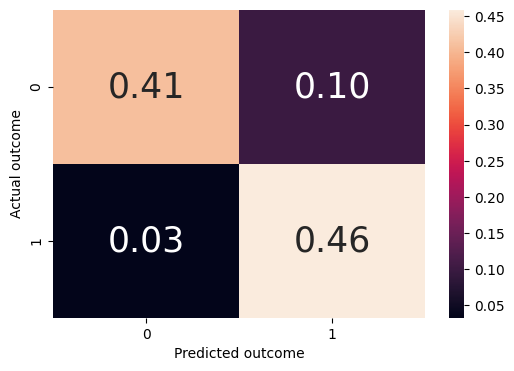

In [18]:
# confusion matrix for best logistic regression model
conf_mat_knn = confusion_matrix(y_test, y_pred_knn)
fig, ax = plt.subplots(figsize=(6,4))
sns.heatmap(conf_mat_knn/np.sum(conf_mat_knn), annot=True, fmt='.2f', annot_kws = {'size':25})
ax.set_ylabel("Actual outcome")
ax.set_xlabel("Predicted outcome")
plt.savefig("heart_attack_plots/confusion_matrix_knn.png")

In [19]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.93      0.81      0.86        31
           1       0.82      0.93      0.88        30

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.88      0.87      0.87        61



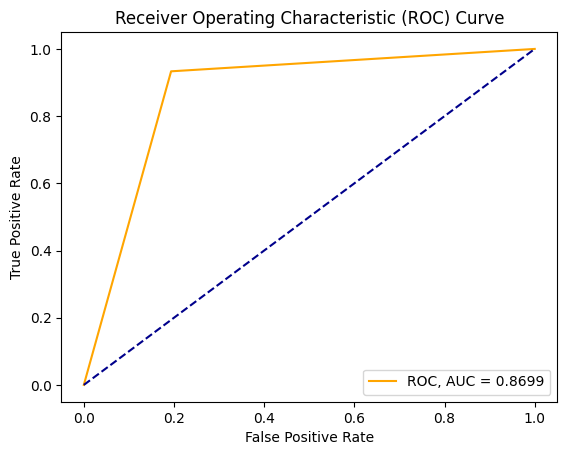

In [20]:
fpr, tpr = roc_curve(y_test, y_pred_knn)[0:2]
auc = roc_auc_score(y_test, y_pred_knn)

plt.plot(fpr, tpr, color='orange', label=f'ROC, AUC = {round(auc,4)}')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

c:\Users\aferg\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/80
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.4370 - loss: 0.6933 - val_accuracy: 0.7213 - val_loss: 0.6925
Epoch 2/80
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6728 - loss: 0.6924 - val_accuracy: 0.8361 - val_loss: 0.6902
Epoch 3/80
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8370 - loss: 0.6896 - val_accuracy: 0.8197 - val_loss: 0.6851
Epoch 4/80
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8551 - loss: 0.6826 - val_accuracy: 0.8361 - val_loss: 0.6715
Epoch 5/80
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8529 - loss: 0.6680 - val_accuracy: 0.8361 - val_loss: 0.6496
Epoch 6/80
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8431 - loss: 0.6478 - val_accuracy: 0.8361 - val_loss: 0.6120
Epoch 7/80
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8179 - loss: 0.6099 - val_accuracy: 0.8525 - val_loss: 0.5600
Epoch 8/80
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8942 - loss: 0.5391 - val_accuracy: 0.8197 - val_loss

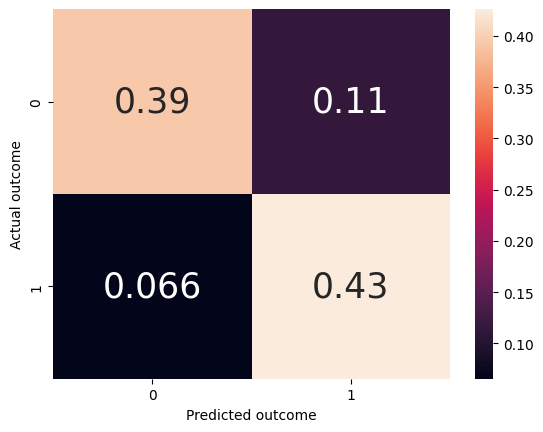

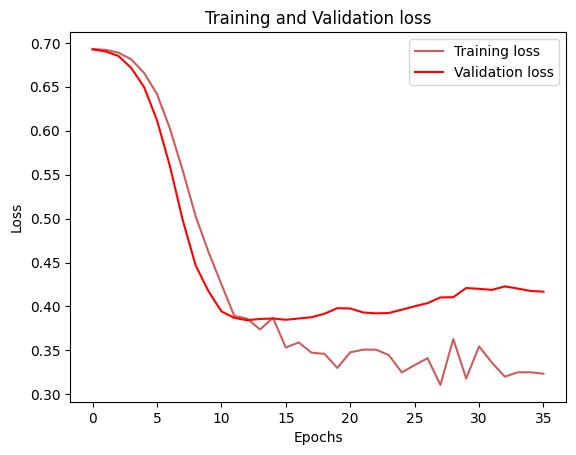

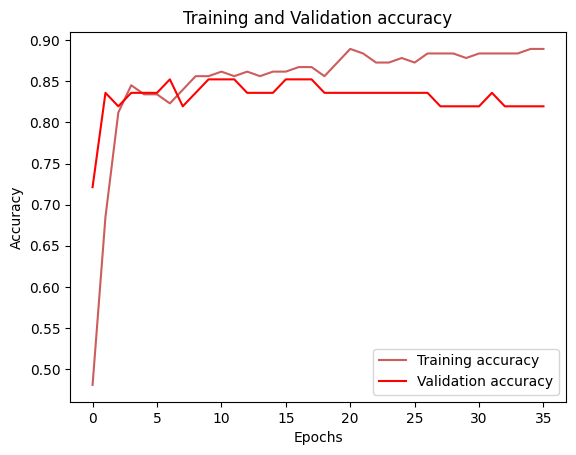

In [21]:
## neural network
start = time.time()
model = Sequential()

##set up the layers
## input layer
model.add(Dense(units= 30, kernel_initializer= 'uniform', activation = 'leaky_relu', input_dim = 13)) 
## hidden layer 1 
model.add(Dense(units= 10, kernel_initializer= 'uniform', activation = 'leaky_relu')) 
##regularization 1
#model.add(Dropout(0.4)) # setting 40% of the data to zero to avoid overfitting
## hidden layer 2
#model.add(Dense(units= 20, kernel_initializer= 'uniform', activation = 'leaky_relu')) 
## regularization 2
model.add(Dropout(0.4)) # another regularisation to avoid overfitting
## output layer
model.add(Dense(units= 1, kernel_initializer= 'uniform', activation = 'sigmoid')) 

## compiling the ANN
model.compile(optimizer = 'adam', loss ='binary_crossentropy', metrics = ['accuracy'])

## train the model with early stopping after enough consecutive epochs without improvement in loss
callback = EarlyStopping(monitor='loss', patience=8)
history = model.fit(x_train, y_train, batch_size = 15, epochs = 80, validation_split=0.25, callbacks=[callback])

## test the model
y_pred = model.predict(x_test)
y_pred = (y_pred > 0.5)
run_time = time.time() - start

print(f"Total run time is: {run_time}")
history_df = pd.DataFrame(history.history)

# confusion matrix for neural network
fig1 = plt.subplots()
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot = True, annot_kws = {'size':25})
plt.ylabel("Actual outcome")
plt.xlabel("Predicted outcome")
plt.savefig("heart_attack_plots/confusion_matrix_ann.png")

print(classification_report(y_test, y_pred))

# plot of training and validation loss
fig2 = plt.subplots()
plt.plot(history_df.loc[:, ['loss']], "#CD5C5C", label='Training loss')
plt.plot(history_df.loc[:, ['val_loss']],"#FF0000", label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="best")
plt.savefig("heart_attack_plots/loss_chart.png")

# Training and validation accuracy plot
fig3 = plt.subplots()
plt.plot(history_df.loc[:, ['accuracy']], "#CD5C5C", label='Training accuracy')
plt.plot(history_df.loc[:, ['val_accuracy']],"#FF0000", label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig("heart_attack_plots/accuracy_chart.png")